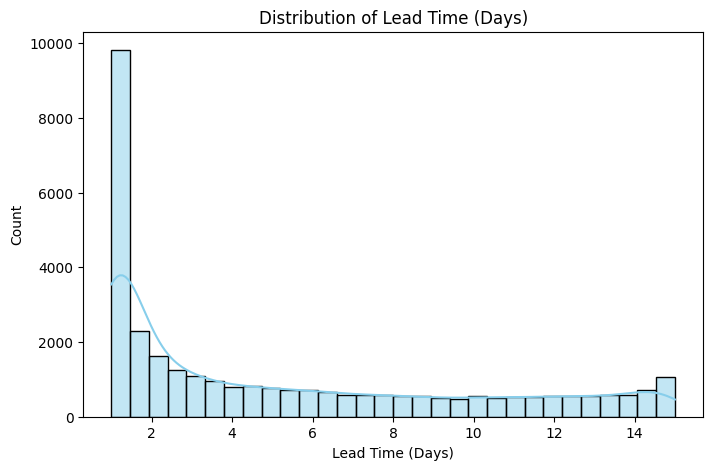

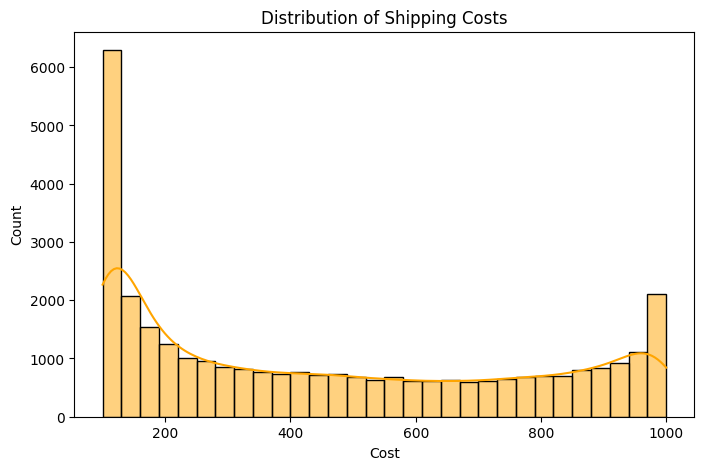

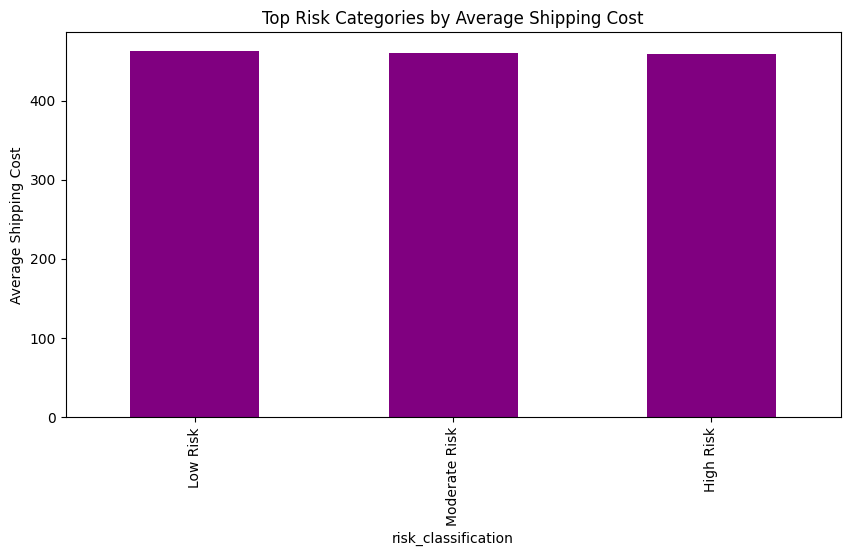

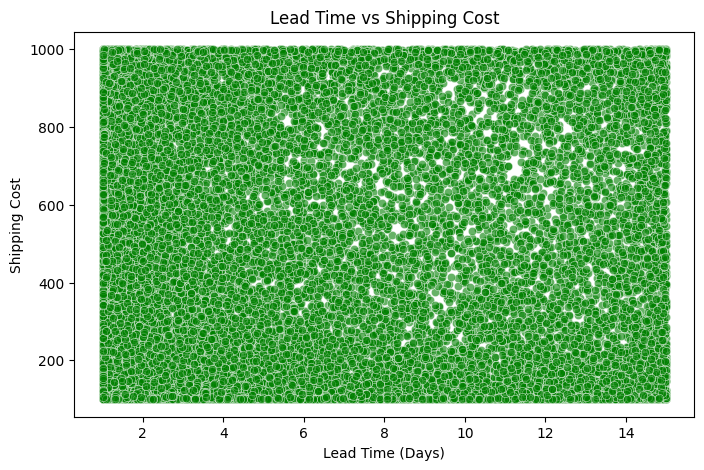

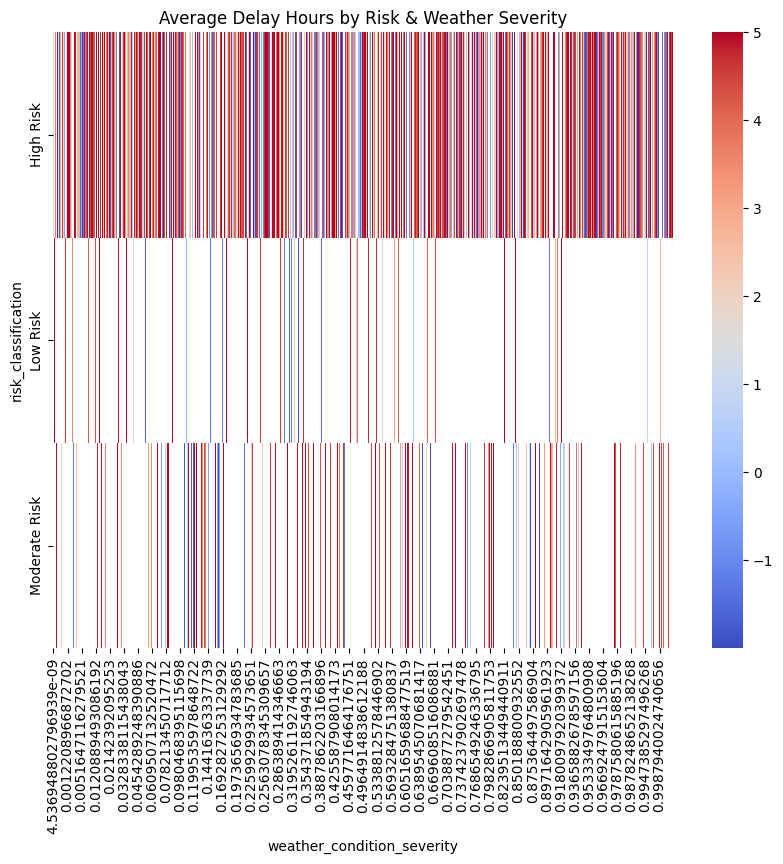

✅ Analysis complete and visuals generated successfully!


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dynamic_chain_logistics.csv")

# Convert date columns (timestamp)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Clean missing values and duplicates
df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude='number').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

# Create new features
df['cost_per_day'] = df['shipping_costs'] / (df['lead_time_days'].replace(0, pd.NA))
df['delay_hours'] = df['eta_variation_hours']

# --- Visualization Section ---

# 1. Distribution of Lead Time (Transit Time)
plt.figure(figsize=(8,5))
sns.histplot(df['lead_time_days'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.show()

# 2. Distribution of Shipping Cost
plt.figure(figsize=(8,5))
sns.histplot(df['shipping_costs'], bins=30, kde=True, color='orange')
plt.title("Distribution of Shipping Costs")
plt.xlabel("Cost")
plt.show()

# 3. Top Risk Levels by Average Shipping Cost
plt.figure(figsize=(10,5))
df.groupby('risk_classification')['shipping_costs'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title("Top Risk Categories by Average Shipping Cost")
plt.ylabel("Average Shipping Cost")
plt.show()

# 4. Lead Time vs Shipping Cost
plt.figure(figsize=(8,5))
sns.scatterplot(x='lead_time_days', y='shipping_costs', data=df, alpha=0.6, color='green')
plt.title("Lead Time vs Shipping Cost")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Shipping Cost")
plt.show()

# 5. Heatmap of Delay Hours by Risk Level and Weather Severity
heatmap_data = df.pivot_table(values='delay_hours',
                              index='risk_classification',
                              columns='weather_condition_severity',
                              aggfunc='mean')

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title("Average Delay Hours by Risk & Weather Severity")
plt.show()

print("✅ Analysis complete and visuals generated successfully!")
df.to_csv("cleaned_dynamic_logistics.csv")
